In [257]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb;
import re
import statistics as st
from scipy import stats

In [74]:
other_train = pd.read_csv("other_train.csv", sep=',', index_col = 0)

In [51]:
other_valid = pd.read_csv("other_valid.csv")

In [166]:
personal_train = pd.read_csv("personal_train.csv",sep=',', index_col = 0)

In [14]:
personal_valid = pd.read_csv("personal_valid.csv")

# DATASET personal_train

In [226]:
personal_train.isna().sum()

name             0
address          0
age              0
sex              0
date_of_birth    0
dtype: int64

Nemusíme si vymazať žiadne záznamy, lebo všetky sú úplné

In [172]:
personal_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 0 to 3932
Data columns (total 5 columns):
name             3933 non-null object
address          3933 non-null object
age              3933 non-null int64
sex              3933 non-null object
date_of_birth    3933 non-null object
dtypes: int64(1), object(4)
memory usage: 184.4+ KB


# Opis atribútov 
### počet záznamov: 3933
### počet atribútov: 5

* **name** 
    - meno osoby v datasete
    - type object
* **address** 
    - adresa osoby v datasete
    - type object
* **age** 
    - vek osoby v datasete
    - type int64
* **sex** 
    - pohlavie osoby v datasete
    - type object
* **date_of_birth** 
    - dátum narodenia osoby v datasete
    - type object

In [235]:
ages = personal_train[(personal_train.age < 130) & (personal_train.age >= 0)]

Odfiltrovanie záznamov kde mali ľudia záznamy veku menej ako 0 alebo viac ako 130 rokov

In [240]:
ages.describe(include = np.number)

,age
count,3539.000000
mean,51.771404
std,11.813298
min,3.000000
25%,44.000000
50%,52.000000
75%,59.000000
max,113.000000


In [238]:
stats.mode(ages['age'])

ModeResult(mode=array([53], dtype=int64), count=array([139]))

In [241]:
personal_train.describe(exclude = np.number)

,name,address,sex,date_of_birth
count,3933,3933,3933,3933
unique,3933,3933,2,3706
top,Joseph Matos,Unit 7739 Box 6743\r\nDPO AP 36241,Male,1963-02-12
freq,1,1,2646,4


In [221]:
personal_train['sex'].unique()

array([' Male', ' Female'], dtype=object)

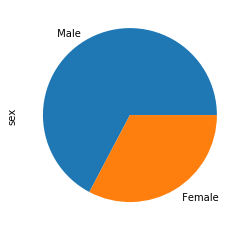

In [244]:
personal_train['sex'].value_counts().plot(kind="pie")

### Deskriptívne štatistické údaje pre nečíslené atribúty nám vrátili:
* počet unikátnych mien sa zhoduje s celkovým počtom mien z čoho vyplýva že v datasete nie sú jediný menovci
* atribút pohlavia je distribuovaný iba medzi dve hdonoty a to na mužov(M) a ženy(F)
* z 3933 ľudí v datasete až 2646 záznamov patrí mužom
* najčastejší dátum narodenia je 12 februára 1963 a to presne 4 majú narodeniny v rovnaký deň

### Deskriptívne štatistické údaje pre číselné atribúty nám vrátili:

* primerný vek je 51,77 roka
* až 75% záznamov je od ľudí starších ako 44 rokov
* iba 25% záznamov je od ľudí starších ako 59 rokov
* medzikvartilové rozpetie je teda 15 rokov, a z predošlých záznamov nám z toho vyplýva že 50% záznamov je od ľudí približne stredného veku
* vekový rozsah je od 3 po 113 rokov


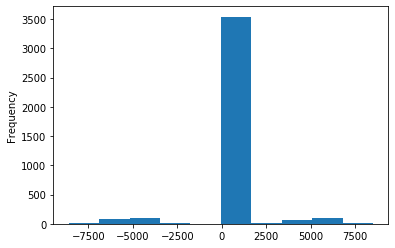

In [246]:
personal_train["age"].plot.hist()

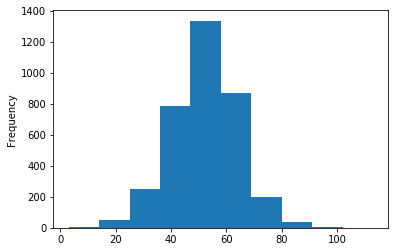

In [245]:
ages["age"].plot.hist()

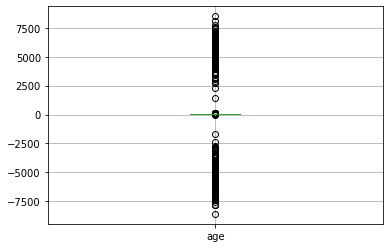

In [250]:
personal_train.boxplot("age")

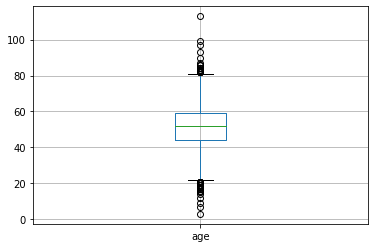

In [249]:
ages.boxplot("age")

##  Problémy
* dátumy narodanie sú v rôznych formátoch
* roky niektorých ľudí sú mimo rozumný rozsah
* \r\n v adrese





# DATASET other_train

In [75]:
def process_pi(text):
    if pd.isnull(text):
        return pd.Series([np.nan]*5)
    splitted_pi = re.split('[| \r\r\n]',text)
    splitted_pi = list(filter(None,splitted_pi))
    splitted_pi.remove("--")
    return pd.Series([splitted_pi[0],splitted_pi[1],splitted_pi[2],splitted_pi[3],splitted_pi[4]])

In [76]:
other_train[['job','state','Family status','Home','Color']] = other_train['personal_info'].apply(process_pi)
print("Rozloženie atribútu personal info")

Rozloženie atribútu personal info


In [78]:
del other_train["personal_info"]

In [79]:
other_train.isna().sum()

name                  0
address               0
kurtosis_oxygen      21
pregnant             15
education-num        11
relationship         13
skewness_glucose     12
mean_glucose        416
std_oxygen           18
capital-gain          8
skewness_oxygen      15
kurtosis_glucose     14
education            14
fnlwgt               19
class                13
std_glucose           9
income               15
mean_oxygen          14
hours-per-week       16
capital-loss         12
job                  13
state                13
Family status        13
Home                 13
Color                13
dtype: int64

Tento dataset má množstvo nevyplnených atribútov najviac chýbajúcich je pre atribút mean_glucose

In [80]:
other_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 25 columns):
name                3983 non-null object
address             3983 non-null object
kurtosis_oxygen     3962 non-null float64
pregnant            3968 non-null object
education-num       3972 non-null float64
relationship        3970 non-null object
skewness_glucose    3971 non-null float64
mean_glucose        3567 non-null float64
std_oxygen          3965 non-null float64
capital-gain        3975 non-null float64
skewness_oxygen     3968 non-null float64
kurtosis_glucose    3969 non-null float64
education           3969 non-null object
fnlwgt              3964 non-null float64
class               3970 non-null float64
std_glucose         3974 non-null float64
income              3968 non-null object
mean_oxygen         3969 non-null float64
hours-per-week      3967 non-null float64
capital-loss        3971 non-null float64
job                 3970 non-null object
state             

# Opis atribútov 
### počet záznamov: 3983
### počet atribútov: 25 (po rozložení atribúto personal info do viacerých atribútov)

* **name** 
    - meno osoby v datasete 
    - typ object
* **address**
    - adresa osoby v datasete
    - typ object
* **kurtosis_oxygen**
    - rozloženie údajov o kyslíku
    - typ float64
* **pregnant**
    - stav tehotenstva
    - typ object
* **education-num**
    - niečo so vzdelaním
    - typ float64
* **relationship** 
    - niečo so vzťahom
    - typ float64
* **skewness_glucose** 
    - rozdelenie početnosti cukru
    - hodnoty by mali byť v rozsahu <-1,1>
    - typ float64
* **mean_glucose**
    - priemerná hodnota cukru v krvi
    - typ float64
* **std_oxygen** 
    - štandardná odchýlka pri meraní kyslíka 
    - typ float64
* **capital-gain**
    - zarobený kapitál 
    - typ float64
* **skewness_oxygen**     
    - rozdelenie početnosti kyslíka
    - hodnoty by mali byť v rozsahu <-1,1>
    - typ float64
* **kurtosis_glucose**    
    - rozloženie údajov o cukre
    - typ float64
* **education**           
    - dosiahnuté vzdelanie
    - typ object
* **fnlwgt**              
    - dôležitosť osoby 
    - typ float64
* **class**               
    - stav cukrovky
    - hodnoty 0/1
    - typ float64
* **std_glucose**
    - štandardná odchýlka pri meraní cukru
    - typ float64
* **income**
    - príjem osoby 
    - typ object
* **mean_oxygen**
    - priemerná hodnota nameraného kyslíka v krvi
    - typ float64
* **hours-per-week**
     - pracovný čas 
     - typ float64
* **capital-loss**  
    - stratený kapitál 
    - typ float64
* **job**                
    - práca
    - typ object
* **state**               
    - štát
    - typ object
* **Family status**       
    - rodinný status 
    - typ object
* **Home**                
    - bývanie
    - typ object
* **Color**               
    - rasa 
    - typ object

In [163]:
other_train

,name,address,kurtosis_oxygen,pregnant,education-num,relationship,skewness_glucose,mean_glucose,std_oxygen,capital-gain,...,std_glucose,income,mean_oxygen,hours-per-week,capital-loss,job,state,Family status,Home,Color
0,Brian Newhall,"52925 Barton Ville Suite 664\r\nEast Whitney, ...",8.289889,f,14.0,Not-in-family,-0.378956,119.445312,17.929757,0.0,...,53.143057,<=50K,2.932274,50.0,0.0,Craft-repair,United-States,Never-married,Private,White
1,Patrick Behne,"037 Long Springs\r\nPort Maria, OH 58969",4.322444,t,6.0,Husband,4.146348,77.085938,43.980061,0.0,...,43.391932,<=50K,10.596154,40.0,0.0,Other-service,United-States,Married-civ-spouse,Private,Black
2,Steven Arnold,"471 Kevin Spurs Suite 564\r\nReneeland, NC 84482",4.702130,f,5.0,Own-child,-0.170853,126.046875,36.950157,0.0,...,50.909365,<=50K,7.939799,40.0,0.0,Machine-op-inspct,United-States,Never-married,Private,White
3,Mark Turner,"459 Parsons Centers\r\nWest Laura, UT 03831",15.348017,f,13.0,Husband,0.219464,109.289062,13.871366,0.0,...,50.772802,>50K,0.950669,40.0,0.0,Prof-specialty,United-States,Married-civ-spouse,Local-gov,White
4,Mike Sams,"3148 Danielle Walk Apt. 320\r\nSaraborough, CA...",1.972958,f,12.0,Husband,18.011655,53.789062,67.752058,7688.0,...,30.062085,>50K,30.670569,50.0,0.0,Sales,United-States,Married-civ-spouse,Private,White
5,Scott Chambliss,USCGC Marquez\r\nFPO AE 35437,5.928902,f,9.0,Wife,-0.318784,110.070312,25.913545,0.0,...,50.985933,<=50K,5.086120,20.0,0.0,Transport-moving,United-States,Married-civ-spouse,??,White
6,Eddy Kessler,7646 Holder Garden Suite 721\r\nPort Christine...,8.914690,f,9.0,Husband,-0.261854,131.101562,16.870114,0.0,...,52.347523,<=50K,2.840301,50.0,0.0,Exec-managerial,United-States,Married-civ-spouse,nan,White
7,David Walters,677 Charles Stravenue Suite 998\r\nFrancisfort...,11.939385,F,10.0,Own-child,-0.271453,120.023438,11.912406,0.0,...,49.763419,<=50K,1.663880,40.0,0.0,Adm-clerical,United-States,Never-married,Private,White
8,Alonzo Ellis,7401 Donaldson Lake Apt. 338\r\nPort Wayneview...,11.756891,f,9.0,Husband,0.594105,97.914062,16.101629,0.0,...,42.030872,<=50K,1.530100,45.0,0.0,Craft-repair,United-States,Married-civ-spouse,Private,White
9,Jose Holmes,"5519 Henry Hollow\r\nLisamouth, MD 56399",1.370528,f,13.0,Not-in-family,38.328764,17.671875,63.742608,0.0,...,29.867706,<=50K,49.280936,50.0,0.0,?,United-States,Married-spouse-absent,?,White
